# <span style='color:royalBlue'>송인욱 - 사회 트랜드와 공연
***********************

In [1]:
from bs4 import BeautifulSoup
import platform
import requests
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.font_manager as fm

In [2]:
class NaverNews:
    url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge'

    def __init__(self, search, sort, name=''):
        search = '&query=' + str(search)
        sort = '&sort=' + str(sort)
        self.search = search
        self.sort = sort
        self.name = name
        self.search_url = NaverNews.url + search + sort

    
    def find_tum_text(self, maxpage, tumClass = 'api_txt_lines dsc_txt_wrap'):

        result_list = []

        for num in range(1, maxpage+1):
            page_num = '&start=' + str(10*num-9)
            full_url = self.search_url + page_num 
            req = requests.get(full_url)
            bs = BeautifulSoup(req.text, "html.parser")

            tums = bs.find_all('a', {'class': tumClass})

            for tum in tums:
                result_list.append(tum.text)
        
        return result_list

In [3]:
def get_html(url):
        try:
            req = requests.get(url)
        except requests.exceptions.RequestException:
            return None

        return BeautifulSoup(req.text, "html.parser")

In [1]:
def daum_web_find(search, maxpage=1):  
    url = 'https://search.daum.net/search?nil_suggest=btn&w=fusion&DA=SBC&q=' + search
    result = []

    for i in range(1,maxpage+1):
        url2 = url + '&p=' + str(i)
        html = get_html(url2)

        a = html.find_all('p',{'class': 'desc'})
        for i in a:
            result.append(i.text)    
    
    return result

In [5]:
def to_txt(list, filename):
    with open(filename,'w',encoding='UTF-8') as f:
        for txt in list:
            f.write(txt+'\n')

In [6]:
def make_wordcloud(filepath):
    daum_pos = open(filepath, encoding='utf-8').read()
    okt = Okt()

    sentences_tag = []
    sentences_tag = okt.pos(daum_pos)

    noun_adj_list = []
    for word, tag in sentences_tag:
        if tag in ["Noun", "Adjective"]:
            noun_adj_list.append(word)

    counts = Counter(noun_adj_list)
    tags = counts.most_common(35)

    if platform.system() == "Windows":
        path = r"c:\Windows\Fonts\malgun.ttf"
        plt.rc('font', family='Malgun Gothic')
        
    elif platform.system() == "Darwin":
        path = r"/System/Library/Fonts/AppleGothic"
        plt.rc('font', familly='AppleGothic')
    else:
        path = r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf"


    wc = WordCloud(font_path=path, background_color="white", max_font_size=80)
    cloud = wc.generate_from_frequencies(dict(tags))


    plt.figure(figsize=(10, 8))
    plt.axis("off")
    plt.imshow(cloud, interpolation="bilinear")
    plt.show()

****
## <span style='color:royalBlue'>데이터 크롤링

In [7]:
# result = daum_web_find('페스티벌+별로', 100)
# to_txt(result, '다음_페스티벌+별로.txt')

In [8]:
result = NaverNews('홀랜페+논란', 0)
result = result.find_tum_text(10)
to_txt(result, '네이버뉴스_흠뻑쇼+논란.txt')

*****************
## <span style='color:royalBlue'>사회 이슈로 살펴본 공연

### <span style='color:royalBlue'>공연과 연관된 사회 문제 뉴스검색

#### 네이버 뉴스 페스티벌 위험, 공연 사고 검색 결과
**안전**, **코로나**, **감염**, **방역**

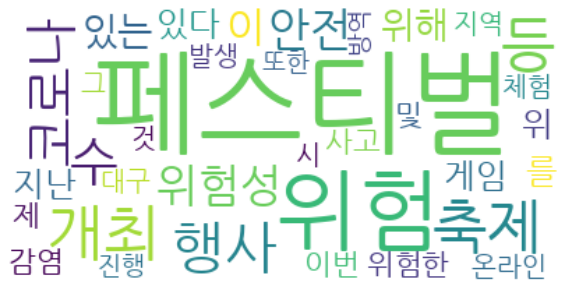

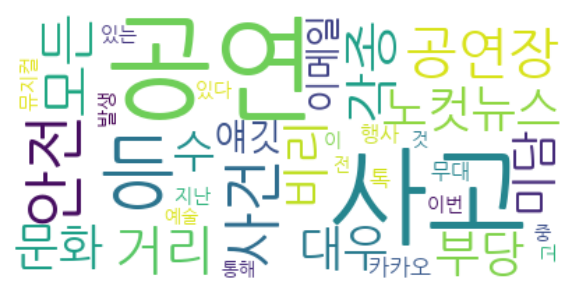

(None, None)

In [9]:
make_wordcloud('./네이버뉴스_페스티벌+위험.txt'), make_wordcloud('./네이버뉴스_공연+사고.txt')

********
### <span style='color:royalBlue'>사회적으로 이슈가 되었던 공연들

#### 홀리데이 랜드 페스티벌 : 당일날 취소 통보 (태풍으로 인한 안전문제)

- 홀리데이 랜드 페스티벌 네이버 뉴스 검색 결과
    - **취소**, **우천**

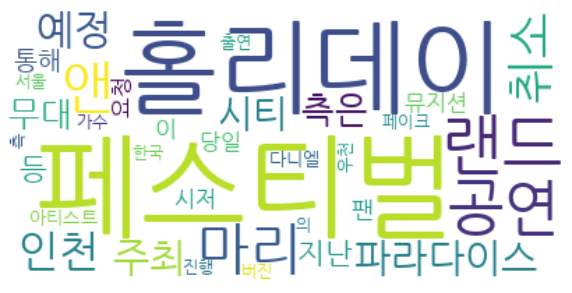

In [10]:
make_wordcloud('./네이버뉴스_홀랜페.txt')

- 다음 통합웹 홀랜페 취소 검색 결과
    - **환불**, **주최**

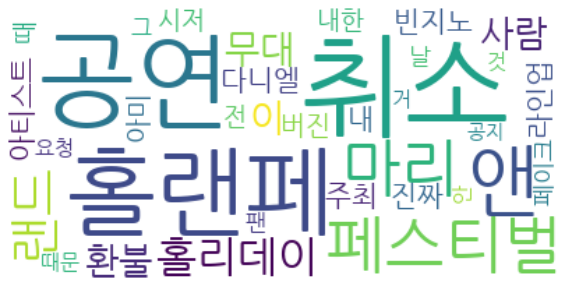

In [11]:
make_wordcloud('./다음_홀랜페+취소.txt')

#### 흠뻑쇼, 워터밤 : 가뭄에 물 소비 관련 논란과 코로나 확산 우려

- 네이버 뉴스에서 흠뻑쇼 검색 결과
    - **코로나**, **방역**, **논란**

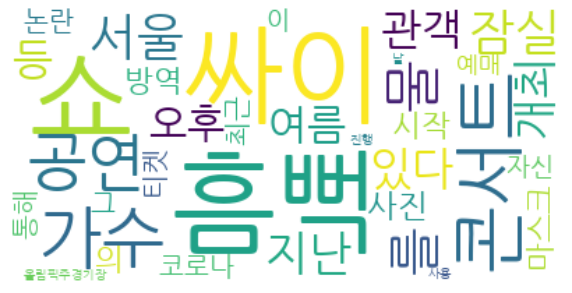

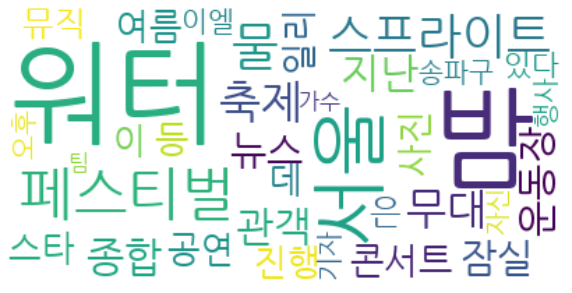

In [12]:
make_wordcloud('./네이버뉴스_흠뻑쇼.txt')
make_wordcloud('./네이버뉴스_워터밤.txt')

- 네이버 뉴스에서 흠뻑쇼 논란 검색 결과
    - **가뭄**, **물**

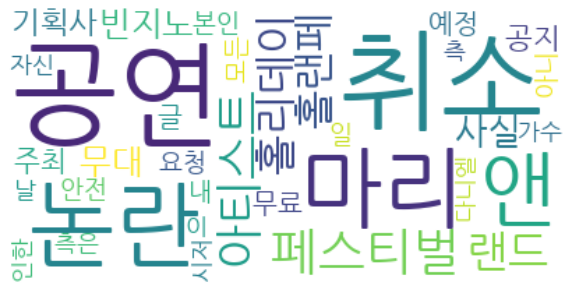

In [13]:
make_wordcloud('./네이버뉴스_흠뻑쇼+논란.txt')

- 다음 통합웹검색에서 흠뻑쇼 후기 검색
    - **코로나**

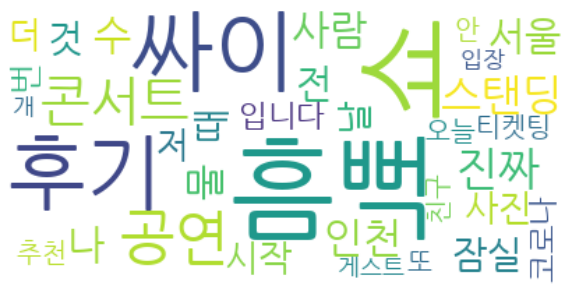

In [14]:
make_wordcloud('./다음_흠뻑쇼+후기.txt')

****
### <span style='color:royalBlue'>공연 반응 트랜드 비교

#### 긍정적 트랜드 검색

**아이**, **오케스트라**, **뮤지컬**

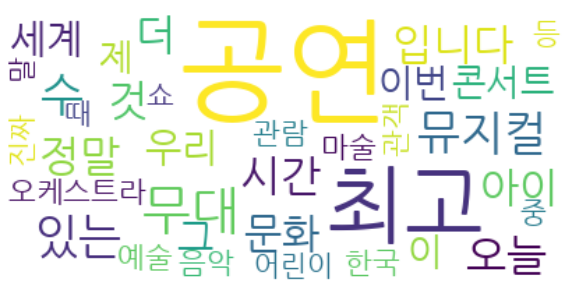

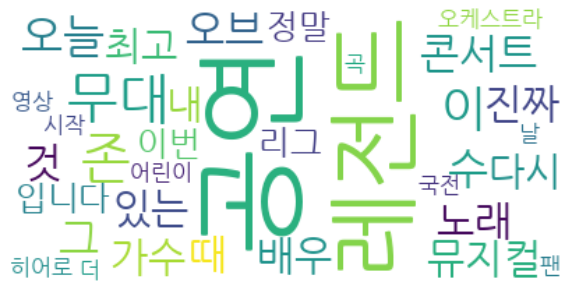

(None, None)

In [15]:
make_wordcloud('./다음_공연+최고.txt'), make_wordcloud('./다음_공연+레전드.txt')

#### 부정적 트랜드 검색

**시간**, **때**, **관객**, **상태**

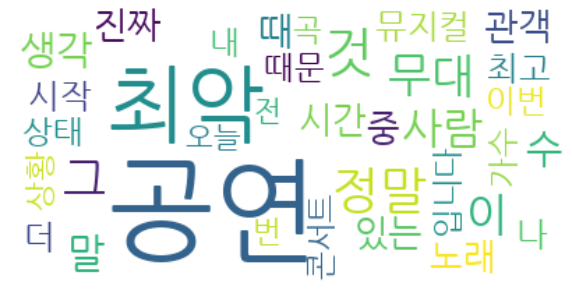

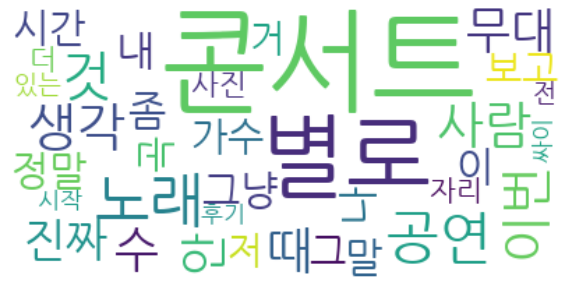

FileNotFoundError: [Errno 2] 그런 파일이나 디렉터리가 없습니다: './다음_페스티벌+별로.txt'

In [16]:
make_wordcloud('./다음_공연+최악.txt'), make_wordcloud('./다음_콘서트+별로.txt'), make_wordcloud('./다음_페스티벌+별로.txt')

********
# <span style='color:royalBlue'>5조 최종 결론

코로나 감소로 **수요 증가** 및 문화공연의 높은 **가치 창출** 능력   

그 중에서도 **뮤지컬**과 **콘서트**에 대한 관심도가 높음  

연령대는 **2030여성**이 제일 관심이 많으며 기간은 **연말**에 많이 열리고 **실내 홀 공연** 위주의 수요  

또한 **코로나**같은 각종 **사회 이슈**에도 대중들은 민감하게 반응 -> **사회적 책임감** 필요